# Metodo de Newton para búsqueda en linea 

In [69]:
import numpy as np
from numpy import linalg as la

In [70]:
f=open("yk.txt", "r")
contenido=f.read()
contenido=contenido.split(',')

In [71]:
l=1000.0 #definimos lambda como una variable global
n=int(contenido[0]) #n tambien
y=np.zeros(n)   #y como un vector global de datos 
for i in range (1,len(contenido)):
    y[i-1]=float(contenido[i])

In [72]:
#Definición de las funciones
def funcion(x): #funcion objetivo
    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

def der_funcion(x): #gradiente de la función
    xm = x[1:-1]
    ym= y[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der=np.zeros(n)
    der[0]=2*(x[0]-y[0])-2*l*(x[1]-x[0])
    der[1:-1]=2*(xm-ym)+2*l*(2*xm-1*(xm_p1+xm_m1))
    der[-1]=2*(x[-1]-y[-1])+2*l*(x[-1]-x[-2])
    return der

def hessiano_funcion(x):
    hes=np.zeros((n,n)) #una matriz cuadrada de 256 números!!!!!
    hes[0][0]=2+2*l
    hes[1][0]=-2*l
    hes[-1][-1]=2+2*l
    hes[-2][-1]=-2*l
    for i in range (1,n-1):
        hes[i][i]=2+4*l
        hes[i-1][i]=-2*l
        hes[i+1][i]=-2*l
    return hes

In [73]:
#Definición del método de Newton para búsqueda en linea
import matplotlib.pyplot as plt

def backtracking_direction(x,a,p,c,dd,tf): #Veremos si el alpha satisface la condción de Armijo para el suficiente descenso
    alpha=a
    while tf(x+alpha*dd)> tf(x)+c*alpha*np.dot(dd.T,dd):
        alpha=p*alpha
    return alpha #Este es el alpha óptimo 

#función backtracking de la tarea anterior para determinar el tamaño de paso
def newton_line_search(x0,mxitr,tolgrad,tf,gf,H): #todas las condiciones de las funciones de búsqueda en linea.
    iterations=0
    g_k=gf(x0)
    g_k_norm=la.norm(g_k)
    g=-1*np.dot(la.inv(H(x0)),g_k)
    #print(g)
    difrelx=1e10 #inicializamos las diferencias
    difrelf=1e10
    puntoiter=x0
    flag=True
    stepsize=backtracking_direction(puntoiter,1,0.5,0.5,g,tf)
    #stepsize=1e-2 #intentemos con paso fijo
    while iterations<mxitr and g_k_norm>tolgrad:
        g_k=gf(puntoiter)
        g_k_norm=la.norm(g_k)
        while flag==True:
            try:
                la.cholesky(H(puntoiter))
                flag=False#checo si la matriz es definida positiva que garantiza la dirección de descenso
            except:
                print('Matriz no definida positiva lo que no grantiza descenso')
                H(puntoiter)+np.identity(H(puntoiter).shape[0])
        stepsize=backtracking_direction(puntoiter,1,0.1,0.9,g,tf)
        g=-1*np.dot(la.inv(H(puntoiter)),g_k)#esta es la dirección de descenso garantizada porque H es positiva definida 
        puntoiter=puntoiter+stepsize*g
        iterations=iterations+1
        print(iterations-1, '&', la.norm(g_k) )
    return np.array([puntoiter,la.norm(g_k),iterations-1]) #el punto que es y lo que vale 

0 & 4705.379049555944
1 & 1.6363315500143799e-09
1  iteraciones


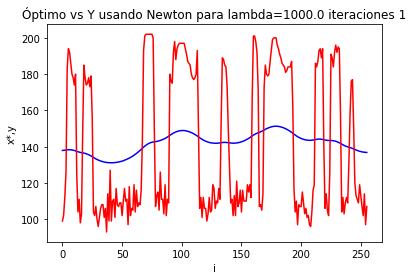

In [74]:
x0=np.zeros(n) #Que pasa con el punto inicial? Pues nada igual converge el algoritmo
resultado=newton_line_search(x0,7000,1e-4,funcion,der_funcion,hessiano_funcion)
index=np.arange(n)
print(str(resultado[2])+'  iteraciones')
plt.title('Óptimo vs Y usando Newton para lambda='+str(l)+ ' iteraciones ' +str(resultado[2]))
plt.ylabel('x*,y')
plt.xlabel('i')
plt.plot(index,resultado[0],'b')
plt.plot(index,y,'r')
#plt.show()
plt.savefig('n_d'+str(l)+'.png')